In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pickle

In [3]:
n_qubits = 512
depth = 1000
shots = 100
ps = np.array([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.15, 0.20])

entropies_zero = {}
entropies_me = {}

for p in ps:
    try:
        with open('{}_{}_{}_{}_zero.pkl'.format(n_qubits, depth, shots, p), 'rb') as f:
            entropies_zero[p] = pickle.load(f)
        with open('{}_{}_{}_{}_me.pkl'.format(n_qubits, depth, shots, p), 'rb') as f:
            entropies_me[p] = pickle.load(f)
    except:
        continue

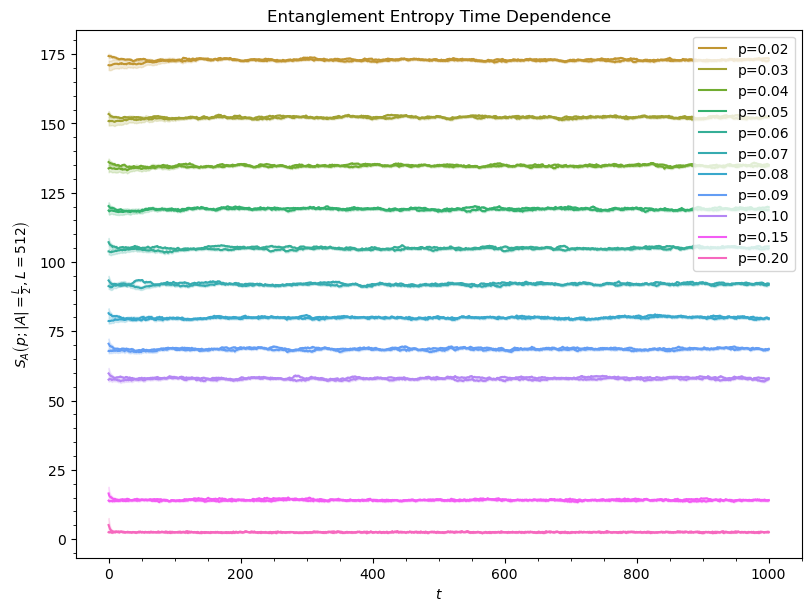

In [5]:
colors = sns.color_palette("husl", len(ps))

plt.subplots(figsize = (8, 6), layout = "constrained")

t = np.arange(depth + 1)

for i, p in enumerate(ps):
    try:
        plt.plot(t, entropies_zero[p][0], label="p={:.2f}".format(p), color=colors[i])
        plt.fill_between(t, entropies_zero[p][0]-entropies_zero[p][1], entropies_zero[p][0]+entropies_zero[p][1], alpha=0.2, color=colors[i])
        plt.plot(t, entropies_me[p][0], color=colors[i])
        plt.fill_between(t, entropies_me[p][0]-entropies_me[p][1], entropies_me[p][0]+entropies_me[p][1], alpha=0.2, color=colors[i])
    except:
        continue

plt.xlabel(r"$t$")
plt.ylabel(r"$S_A\left(p;\left|A\right|=\frac{L}{2},L=512\right)$")
plt.legend()
plt.title("Entanglement Entropy Time Dependence")
plt.legend(loc = "upper right")
# plt.xlim(-25, 1050)
# plt.ylim(-5, 270)
plt.minorticks_on()

In [ ]:
n_qubits = 512
depth = 256
shots = 1000

with open('{}_{}_{}_hist.pkl'.format(n_qubits, depth, shots), 'rb') as f:
    entropies_hist = pickle.load(f)

ps = entropies_hist.keys()

In [ ]:
colors = sns.color_palette("tab10")

plt.subplots(figsize = (8, 6), layout = "constrained")
x = np.arange(0, 250, 0.1)

for i, p in enumerate(ps):
    print("Evolving entropies for p = {}:".format(p))
    entropies = entropies_hist[p]
    plt.hist(entropies, bins=20, color=colors[i], alpha=0.5, density = True)
    plt.plot(x, norm.pdf(x, *norm.fit(entropies)), color=colors[i], label="p={}".format(p))
plt.legend(loc = "right")
# plt.xlim(-5, 265)
# plt.ylim(0, 0.345)
plt.minorticks_on()
plt.grid(linestyle = ":")
plt.ylabel("Normalized Frequency")
plt.xlabel(r"$S_A$ ($p$;$\left|A\right|=L/2$, $L=512$)")
plt.title("Saturated Entanglement Entropy Distribution")